# Calculate percentage of days when Tmean > 90th percentile (TG90p)

Example notebook that runs icclim.

The example calculates the percentage of days when Tas > 90th percentile (TG90pindicator) for the dataset chosen by the user on C4I.  
We assume to have the **tas** variable in netCDF files in a `./data` folder for model `CMCC` and for one member `r1i1p1f1`.  
The data can be dowloaded using the [metalink](data/cmcc_tas.metalink) provided with this notebook.
The data described in a `.metalink` file can be dowloaded with tools such as [aria2](https://aria2.github.io/) or a browser plugin such as [DownThemAll!](https://addons.mozilla.org/en-US/firefox/addon/downthemall/)
If you wish to use a different dataset, you can use the [climate 4 impact portal](https://www.climate4impact.eu/c4i-frontend/) to search and select the data you wish to use and a metalink file to the [ESGF](https://esgf.llnl.gov/) data will be provided.

The data is read using xarray and a plot of the time series over a specific region is generated, as well as an average spatial map. Several output types examples are shown.

The dataset that is expected for this notebook are tas parameter (needed to calculate the TG90p indicator) for one specific climate model and experiment as well as one member. The time period should be continuous.

The following time period is considered: 2081-01-01 to 2100-12-31 using the period 1981-01-01 to 2000-12-31 as a reference. Plots are shown over European region.

### Install packages

In [1]:
%pip install icclim matplotlib nc_time_axis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import sys
from pathlib import Path

import cartopy.crs as ccrs
import cftime
import dask
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import icclim

print("python: ", sys.version)
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)


import xclim

print("xclim: ", xclim.__version__)
print("dask: ", dask.__version__)
print("xarray: ", xr.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.11.7 | packaged by conda-forge | (main, Dec 15 2023, 08:38:37) [GCC 12.3.0]
numpy:  1.26.2
pandas:  2.1.4
xclim:  0.47.0
dask:  2023.12.1
xarray:  2023.10.1
icclim:  6.6.0
cftime:  1.6.3


### Specification of index parameters

In [5]:
# studied period
dt1 = datetime.datetime(2081, 1, 1, tzinfo=datetime.timezone.utc)
dt2 = datetime.datetime(2100, 12, 31, tzinfo=datetime.timezone.utc)

# reference period
dt1r = datetime.datetime(1981, 1, 1, tzinfo=datetime.timezone.utc)
dt2r = datetime.datetime(2000, 12, 31, tzinfo=datetime.timezone.utc)

out_f = "tg90p_icclim.nc"
data_dir = Path("data")
filenames = [str(f) for f in data_dir.glob("tas_day_CMCC-ESM2*.nc")]
filenames

['data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_19250101-19491231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_19500101-19741231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_19750101-19991231.nc',
 'data/tas_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20900101-21001231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_20000101-20141231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_19000101-19241231.nc',
 'data/tas_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20400101-20641231.nc',
 'data/tas_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20650101-20891231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_18500101-18741231.nc',
 'data/tas_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20150101-20391231.nc',
 'data/tas_day_CMCC-ESM2_historical_r1i1p1f1_gn_18750101-18991231.nc']

In [6]:
icclim.index(
    index_name="TG90p",
    in_files=filenames,
    slice_mode="JJA",
    base_period_time_range=[dt1r, dt2r],
    time_range=[dt1, dt2],
    out_unit="%",
    out_file=out_f,
    logs_verbosity="HIGH",
)

2024-01-19 15:27:59,669    ********************************************************************************************
2024-01-19 15:27:59,671    *                                                                                          *
2024-01-19 15:27:59,672    *          icclim                6.6.0   *
2024-01-19 15:27:59,672    *                                                                                          *
2024-01-19 15:27:59,673    *                                                                                          *
2024-01-19 15:27:59,674    *          Fri Jan 19 14:27:59 2024                                                    *
2024-01-19 15:27:59,674    *                                                                                          *
2024-01-19 15:27:59,674    *          BEGIN EXECUTION                                                                 *
2024-01-19 15:27:59,675    *                                                                  

<xarray.Dataset>
Dimensions:      (lat: 192, lon: 288, time: 20, bounds: 2)
Coordinates:
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon          (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height       float64 2.0
    percentiles  float64 90.0
  * time         (time) object 2081-07-16 12:00:00 ... 2100-07-16 12:00:00
  * bounds       (bounds) int64 0 1
Data variables:
    TG90p        (time, lat, lon) float64 dask.array<chunksize=(1, 192, 255), meta=np.ndarray>
    time_bounds  (time, bounds) object 2081-06-01 00:00:00 ... 2100-08-31 00:...
Attributes:
    title:        number_of_days_when_average_air_temperature_is_greater_than...
    references:   ATBD of the ECA&D indices calculation (https://knmi-ecad-as...
    institution:  Climate impact portal (https://climate4impact.eu)
    history:      2020-12-21T16:22:42Z altered by CMOR: Treated scalar dimens...
    source:       
    Conventions:  CF-1.6

### Plot preparation

In [7]:
with xr.open_dataset(out_f, decode_times=False) as ds:
    tg90_xr = ds
    ds["time"] = xr.decode_cf(ds).time

# Select a single x,y combination from the data
longitude = tg90_xr["TG90p"]["lon"].sel(lon=3.5, method="nearest")
latitude = tg90_xr["TG90p"]["lat"].sel(lat=44.2, method="nearest")

print("Long, Lat values:", longitude, latitude)

Long, Lat values: <xarray.DataArray 'lon' ()>
array(3.75)
Coordinates:
    lon          float64 3.75
    height       float64 ...
    percentiles  float64 ...
Attributes:
    long_name:      Longitude
    axis:           X
    standard_name:  longitude
    bounds:         lon_bnds
    units:          degrees_east <xarray.DataArray 'lat' ()>
array(43.82198953)
Coordinates:
    lat          float64 43.82
    height       float64 ...
    percentiles  float64 ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude


### Subset and Plot

<xarray.DataArray 'TG90p' (time: 20)>
[20 values with dtype=float64]
Coordinates:
    lat          float64 43.82
    lon          float64 3.75
    height       float64 ...
    percentiles  float64 ...
  * time         (time) object 2081-07-16 12:00:00 ... 2100-07-16 12:00:00
Attributes:
    long_name:      Number of days when average air temperature is greater th...
    original_name:  TREFHT
    standard_name:  number_of_days_when_average_air_temperature_is_greater_th...
    cell_measures:  area: areacella
    cell_methods:   time: sum over days
    comment:        near-surface (usually, 2 meter) air temperature
    units:          %
    history:        


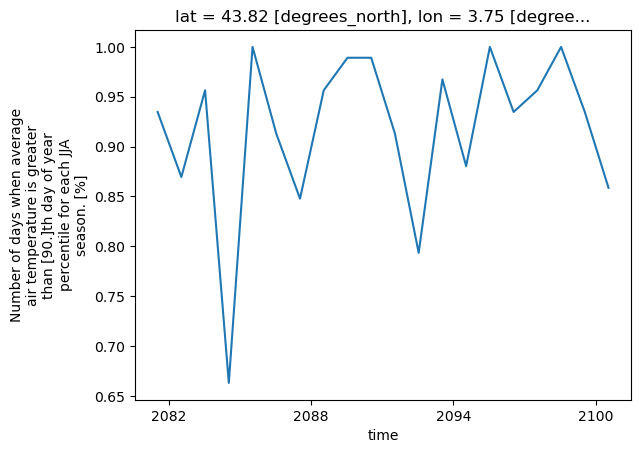

In [8]:
# Slice the data spatially using a single lat/lon point
one_point = tg90_xr["TG90p"].sel(lat=latitude, lon=longitude)
print(one_point)
# Use xarray to create a quick time series plot
one_point.plot.line()
plt.show()

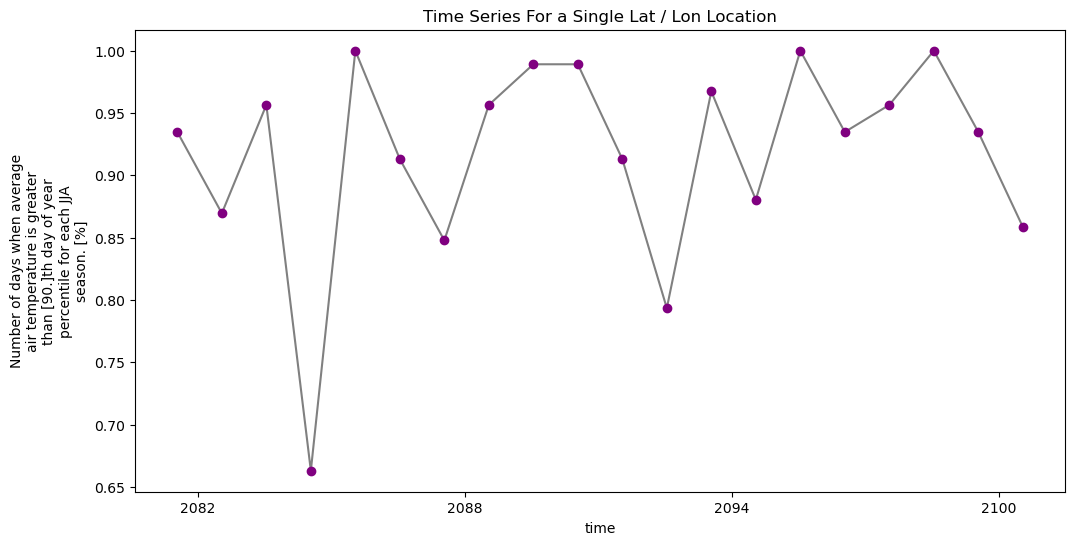

In [9]:
# You can clean up your plot as you wish using standard matplotlib approaches
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(
    hue="lat",
    marker="o",
    ax=ax,
    color="grey",
    markerfacecolor="purple",
    markeredgecolor="purple",
)
ax.set(title="Time Series For a Single Lat / Lon Location")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

In [10]:
# Convert to dataframe -- then this can easily be exported to a csv
one_point_df = one_point.to_dataframe()
# View just the first 5 rows of the data
one_point_df.head()

# Export data to .csv file
# one_point_df.to_csv("one-location.csv")

,lat,lon,height,percentiles,TG90p
time,,,,,
2081-07-16 12:00:00,43.82199,3.75,2.0,90.0,0.934783
2082-07-16 12:00:00,43.82199,3.75,2.0,90.0,0.869565
2083-07-16 12:00:00,43.82199,3.75,2.0,90.0,0.956522
2084-07-16 12:00:00,43.82199,3.75,2.0,90.0,0.663043
2085-07-16 12:00:00,43.82199,3.75,2.0,90.0,1.000000


In [11]:
# Time subsetting: this is just an example on how to do it
start_date = "2081-01-01"
end_date = "2082-12-31"

tg90_two = tg90_xr["TG90p"].sel(time=slice(start_date, end_date))

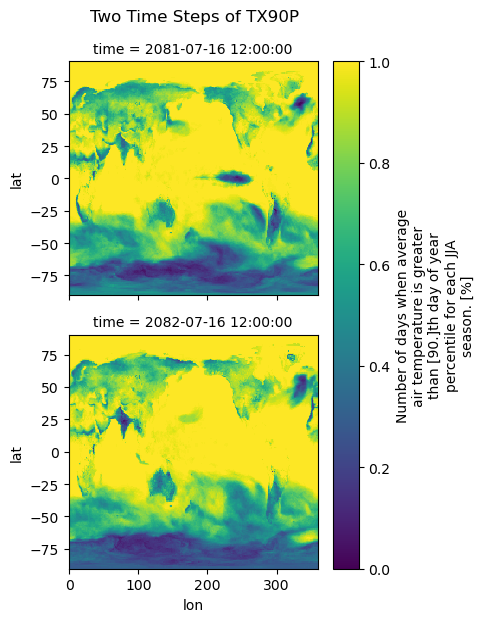

In [12]:
# Quickly plot the data using xarray.plot()
tg90_two.plot(x="lon", y="lat", col="time", col_wrap=1)

plt.suptitle("Two Time Steps of TG90P", y=1.03)
plt.show()

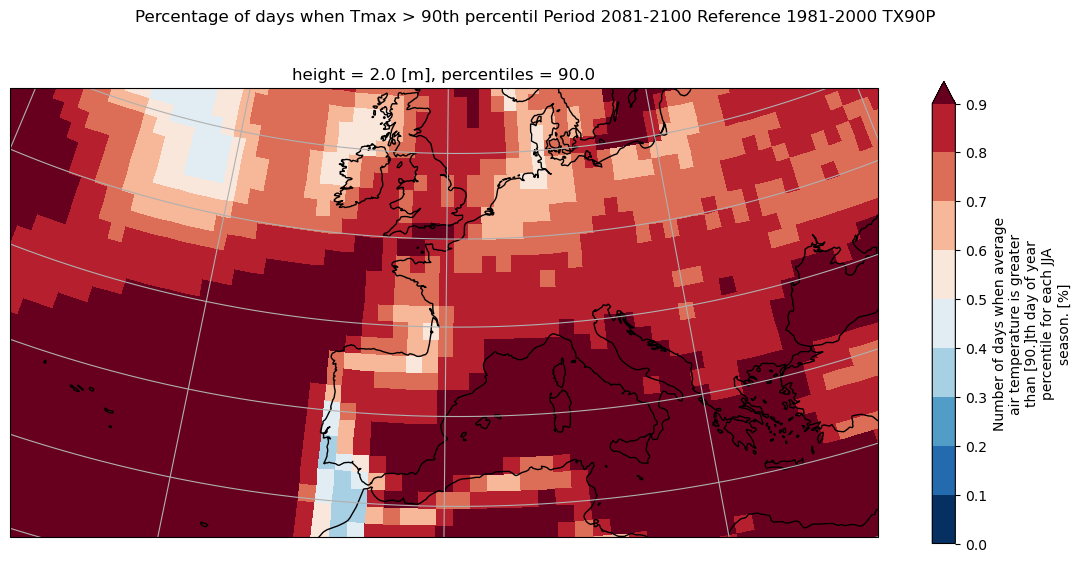

In [13]:
# Set spatial extent and centre
central_lat = 47.0
central_lon = 1.0
extent = [-30, 30, 30, 56]  # Western Europe

tg90 = tg90_xr["TG90p"]

# Calculate time average
tg90_avg = tg90.mean(dim="time", keep_attrs=True)

# Set plot projection
map_proj = ccrs.AlbersEqualArea(
    central_longitude=central_lon, central_latitude=central_lat
)

# Define plot
f, ax = plt.subplots(figsize=(14, 6), subplot_kw={"projection": map_proj})

# Plot data with proper colormap scale range
levels = np.arange(0, 1.0, 0.1)
p = tg90_avg.plot(levels=levels, cmap="RdBu_r", transform=ccrs.PlateCarree())

# Plot information
plt.suptitle(
    "Percentage of days when Tas > 90th percentil Period 2081-2100 Reference 1981-2000 TG90P",
    y=1,
)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig("c4i_tg90p_icclim.png")

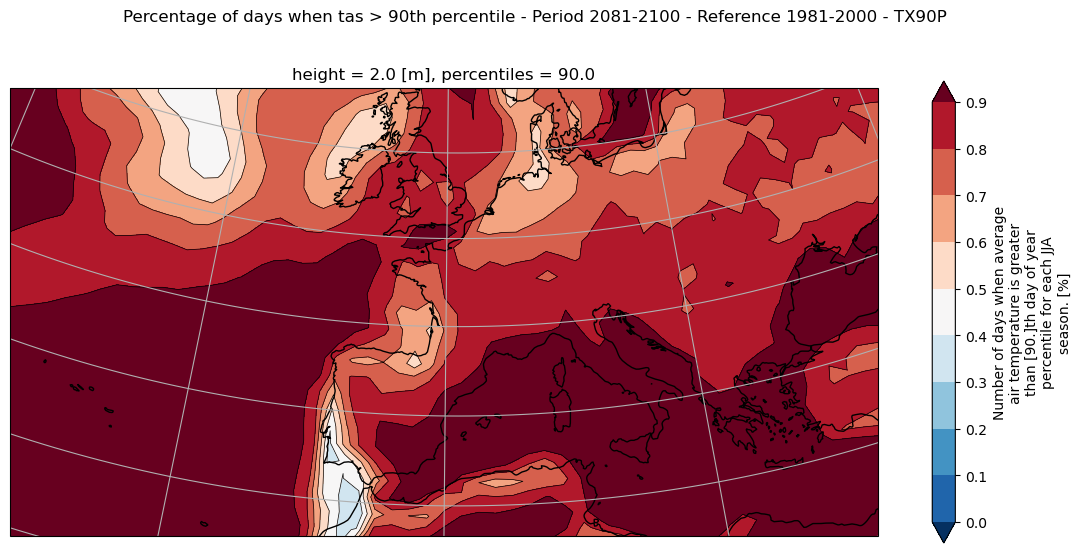

In [14]:
# Re-order longitude so that there is no blank line at 0 deg because 0 deg is within our spatial selection
tg90_avg.coords["lon"] = (tg90_avg.coords["lon"] + 180) % 360 - 180
tg90_avg = tg90_avg.sortby(tg90_avg.lon)

# Define plot
f, ax = plt.subplots(figsize=(14, 6), subplot_kw={"projection": map_proj})

# Define colorscale
levels = np.arange(0, 1.0, 0.1)

# Contours lines
p = tg90_avg.plot.contour(
    levels=levels, colors="k", linewidths=0.5, transform=ccrs.PlateCarree()
)

# Contour filled colors
p = tg90_avg.plot.contourf(
    levels=levels, cmap="RdBu_r", extend="both", transform=ccrs.PlateCarree()
)

# Plot information
plt.suptitle(
    "Percentage of days when tas > 90th percentile - Period 2081-2100 - Reference 1981-2000 - TG90P",
    y=1,
)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig("c4i_tg90p_contours_icclim.png")